In [ ]:
# import the necessary packages
from tensorflow.keras.models import load_model
from imutils.contours import sort_contours
import numpy as np
import argparse
import imutils
import cv2
import os
import glob
import matplotlib.pyplot as plt
import pandas as pd
import cv2
from google.colab.patches import cv2_imshow
import imutils
from imutils import contours
import matplotlib.pyplot as plt

# Now you can use functions from the glob module

from PIL import Image


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
## need to move the file to local

In [ ]:
model = load_model("/content/gdrive/MyDrive/hiragana_recognition_cnn.h5")

In [ ]:
hiragana_list = ['',]

In [ ]:
#prepprocess the pictures in the folder

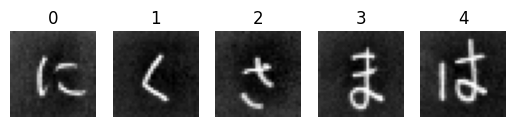

In [ ]:
out_dir = "/content/gdrive/MyDrive/hiraganas"
result = []

# List all image files in the directory
image_files = glob.glob(os.path.join(out_dir, '*.png'))

# Loop through the image files
for i, image_file in enumerate(image_files):
    # Load the image using OpenCV
    img = cv2.imread(image_file)

    # Convert the image to grayscale and resize it to 32x32
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_resized = cv2.resize(img_gray, (32, 32))

    # Append the label (i) and the processed image to the result list
    result.append([i, img_resized])

    # Display the first 5 images
    if i < 5:
        plt.subplot(1, 5, i + 1)
        plt.axis("off")
        plt.title(str(i))
        plt.imshow(img_resized, cmap='gray')

# Show the plotted images
plt.show()



## 同じ種類のデータだから処理がすくないかもだけどカラーの新しい写真だと処理が増えそう

## here make sure that model can take input and make predictions from pictures from same dataset

In [ ]:
for item in result:
    index, image = item
    shape = image.shape
    #print(f"Index {index}: Shape {shape}, Dimensions: {image.ndim}")
result

[[0,
  array([[76, 52, 64, ..., 68, 64, 72],
         [64, 68, 60, ..., 64, 56, 64],
         [64, 64, 64, ..., 56, 64, 59],
         ...,
         [45, 48, 40, ..., 29, 35, 43],
         [36, 40, 35, ..., 32, 40, 33],
         [44, 44, 36, ..., 36, 40, 36]], dtype=uint8)],
 [1,
  array([[60, 60, 52, ..., 40, 44, 48],
         [55, 45, 56, ..., 41, 44, 48],
         [53, 53, 48, ..., 32, 35, 35],
         ...,
         [45, 37, 32, ..., 32, 21, 32],
         [40, 32, 41, ..., 32, 28, 40],
         [48, 40, 40, ..., 40, 24, 32]], dtype=uint8)],
 [2,
  array([[60, 60, 68, ..., 44, 52, 48],
         [60, 56, 64, ..., 48, 44, 47],
         [56, 59, 59, ..., 45, 53, 48],
         ...,
         [48, 56, 53, ..., 51, 51, 56],
         [44, 48, 55, ..., 60, 56, 64],
         [60, 48, 52, ..., 60, 44, 60]], dtype=uint8)],
 [3,
  array([[60, 52, 56, ..., 40, 48, 36],
         [57, 60, 48, ..., 32, 40, 40],
         [56, 55, 48, ..., 35, 32, 40],
         ...,
         [51, 40, 35, ..., 35, 43, 4

In [ ]:
one_image = result[0]
one_image = one_image[1]
one_image.shape
#need to add brightness values

(32, 32)

In [ ]:
im_size = 32
im_color = 1
in_shape = (im_size, im_size, im_color)

new_image = []
for d in result:
  (num, img) = d
  img = img.astype('float').reshape(im_size, im_size, im_color) / 255
  new_image.append(img)
new_image = np.array(new_image)

In [ ]:
new_image[0][10]

array([[0.25098039],
       [0.19215686],
       [0.21960784],
       [0.18823529],
       [0.18823529],
       [0.16078431],
       [0.18823529],
       [0.16078431],
       [0.15686275],
       [0.15294118],
       [0.1254902 ],
       [0.17254902],
       [0.85098039],
       [0.6       ],
       [0.06666667],
       [0.03137255],
       [0.09019608],
       [0.01176471],
       [0.03529412],
       [0.12156863],
       [0.09411765],
       [0.10588235],
       [0.09803922],
       [0.06666667],
       [0.1254902 ],
       [0.10588235],
       [0.20784314],
       [0.1372549 ],
       [0.21568627],
       [0.16862745],
       [0.16862745],
       [0.18823529]])

In [ ]:
new_image.shape

(13, 32, 32, 1)

In [ ]:
predicted = model.predict(new_image)

1/1 [==============================] - 0s 22ms/step


In [ ]:
predictions = np.argmax(predicted, axis=1)
pd.DataFrame(predictions)

,0
0,21
1,7
2,10
3,30
4,25
5,24
6,44
7,2
8,26
9,29


## model works well. Build OCR process from here

In [ ]:
##this part is for object detection , not character itself
# construct the argument parser and parse the arguments
'''
ap = argparse.ArgumentParser()
ap.add_argument("-i", "--image", required=True,
	help="path to input image")
ap.add_argument("-m", "--model", type=str, required=True,
	help="path to trained handwriting recognition model")

args = vars(ap.parse_args())
'''

'\nap = argparse.ArgumentParser()\nap.add_argument("-i", "--image", required=True,\n\thelp="path to input image")\nap.add_argument("-m", "--model", type=str, required=True,\n\thelp="path to trained handwriting recognition model")\n\nargs = vars(ap.parse_args())\n'

In [ ]:
image = cv2.imread("/content/gdrive/MyDrive/hello.png")

In [ ]:
##this part is for object detection , not character itself. 写真の処理

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
# perform edge detection, find contours in the edge map, and sort the
# resulting contours from left-to-right
edged = cv2.Canny(blurred, 30, 150)
cnts_image = edged
cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

cnts = sort_contours(cnts, method="left-to-right")[0]
# initialize the list of contour bounding boxes and associated
# characters that we'll be OCR'ing
chars = []


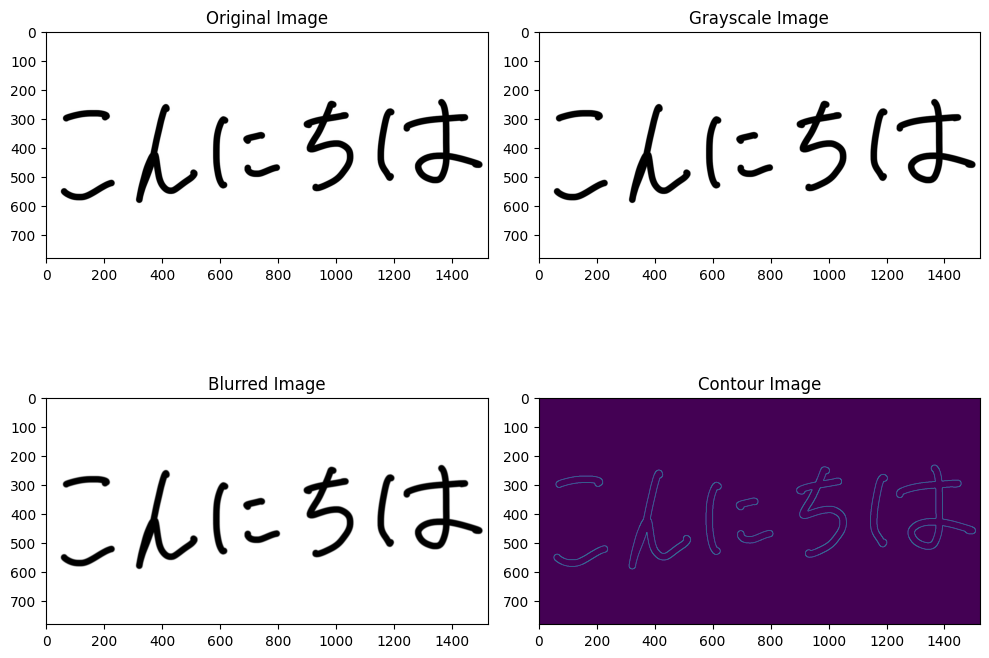

In [ ]:
# Create a 2x2 grid for displaying images
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed

# Display the original image
plt.subplot(2, 2, 1)
plt.imshow(image)
#plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")

# Display the grayscale image
plt.subplot(2, 2, 2)
plt.imshow(gray, cmap='gray')
plt.title("Grayscale Image")

# Display the blurred image
plt.subplot(2, 2, 3)
plt.imshow(blurred, cmap='gray')
plt.title("Blurred Image")

# Display the contour image
plt.subplot(2, 2, 4)
plt.imshow(cnts_image)
#plt.imshow(cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))
plt.title("Contour Image")

# Show the 2x2 grid of images
plt.tight_layout()
plt.show()


In [ ]:
#data processing objects that detected in conturs detection
# loop over the contours
for c in cnts:
	# compute the bounding box of the contour
	(x, y, w, h) = cv2.boundingRect(c)
	# filter out bounding boxes, ensuring they are neither too small
	# nor too large
	if (w >= 20 and w <= 1500) and (h >= 20 and h <= 1200):
		# extract the character and threshold it to make the character
		# appear as *white* (foreground) on a *black* background, then
		# grab the width and height of the thresholded image
		roi = gray[y:y + h, x:x + w]
		thresh = cv2.threshold(roi, 0, 255,
cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
		(tH, tW) = thresh.shape
		# if the width is greater than the height, resize along the width dimension
		if tW > tH:
			thresh = imutils.resize(thresh, width=32)
		# otherwise, resize along the height
		else:
			thresh = imutils.resize(thresh, height=32)
   		# re-grab the image dimensions (now that its been resized)
		# and then determine how much we need to pad the width and
		# height such that our image will be 32x32
		(tH, tW) = thresh.shape
		dX = int(max(0, 32 - tW) / 2.0)
		dY = int(max(0, 32 - tH) / 2.0)
		# pad the image and force 32x32 dimensions
		padded = cv2.copyMakeBorder(thresh, top=dY, bottom=dY,
			left=dX, right=dX, borderType=cv2.BORDER_CONSTANT,
			value=(0, 0, 0))
		padded = cv2.resize(padded, (32, 32))
		# prepare the padded image for classification via our
		# handwriting OCR model
		padded = padded.astype("float32") / 255.0
		padded = np.expand_dims(padded, axis=-1)
		# update our list of characters that will be OCR'd
		chars.append((padded, (x, y, w, h)))

In [ ]:
chars

[(array([[[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
  
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
  
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
  
         ...,
  
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
  
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
  
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]]], dtype=float32),
  (51, 512, 186, 72)),
 (array([[[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
  
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
  
         [[0.],
          

In [ ]:
# extract the bounding box locations and padded characters
boxes = [b[1] for b in chars]
chars = np.array([c[0] for c in chars], dtype="float32")
# OCR the characters using our handwriting recognition model
preds = model.predict(chars)

1/1 [==============================] - 0s 24ms/step


In [ ]:
boxes

[(51, 512, 186, 72),
 (58, 272, 162, 40),
 (310, 251, 213, 342),
 (575, 293, 54, 250),
 (679, 347, 76, 42),
 (684, 459, 123, 45),
 (887, 240, 173, 313),
 (1142, 266, 59, 251),
 (1232, 234, 273, 291)]

In [ ]:
labelNames = ['あ','い','う','え','お',
              'か','き','く','け','こ',
              'さ','し','す','せ','そ',
              'た','ち','つ','て','と',
              'な','に','ぬ','ね','の',
              'は','ひ','ふ','へ','ほ',
              'ま','み','む','め','も',
              'や','ゆ','よ',
              'ら','り','る','れ','ろ',
              'わ','を','ん']

# 濁音、半濁音が見つかった時はくっつける

[INFO] せ - 96.65%


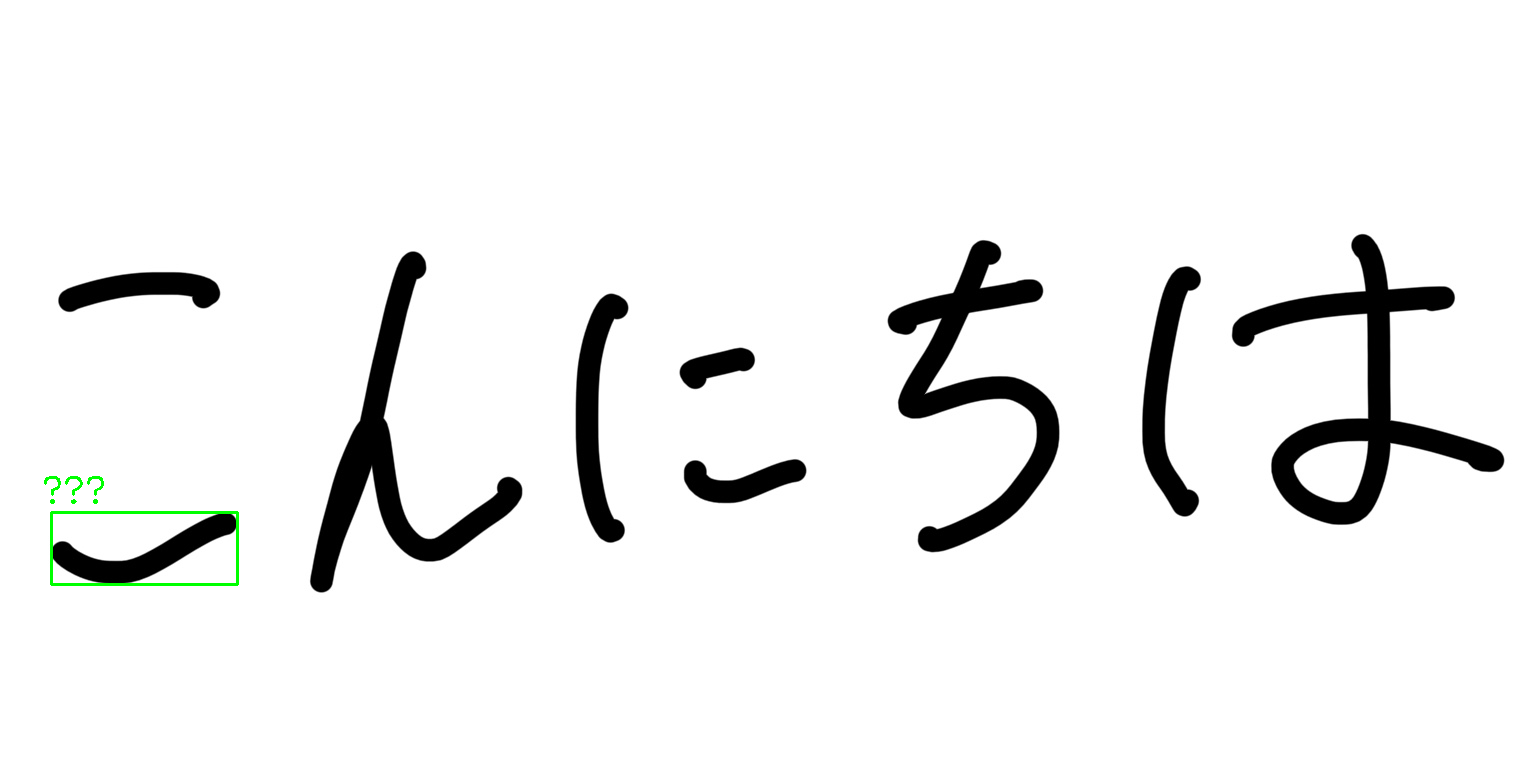

[INFO] つ - 99.68%


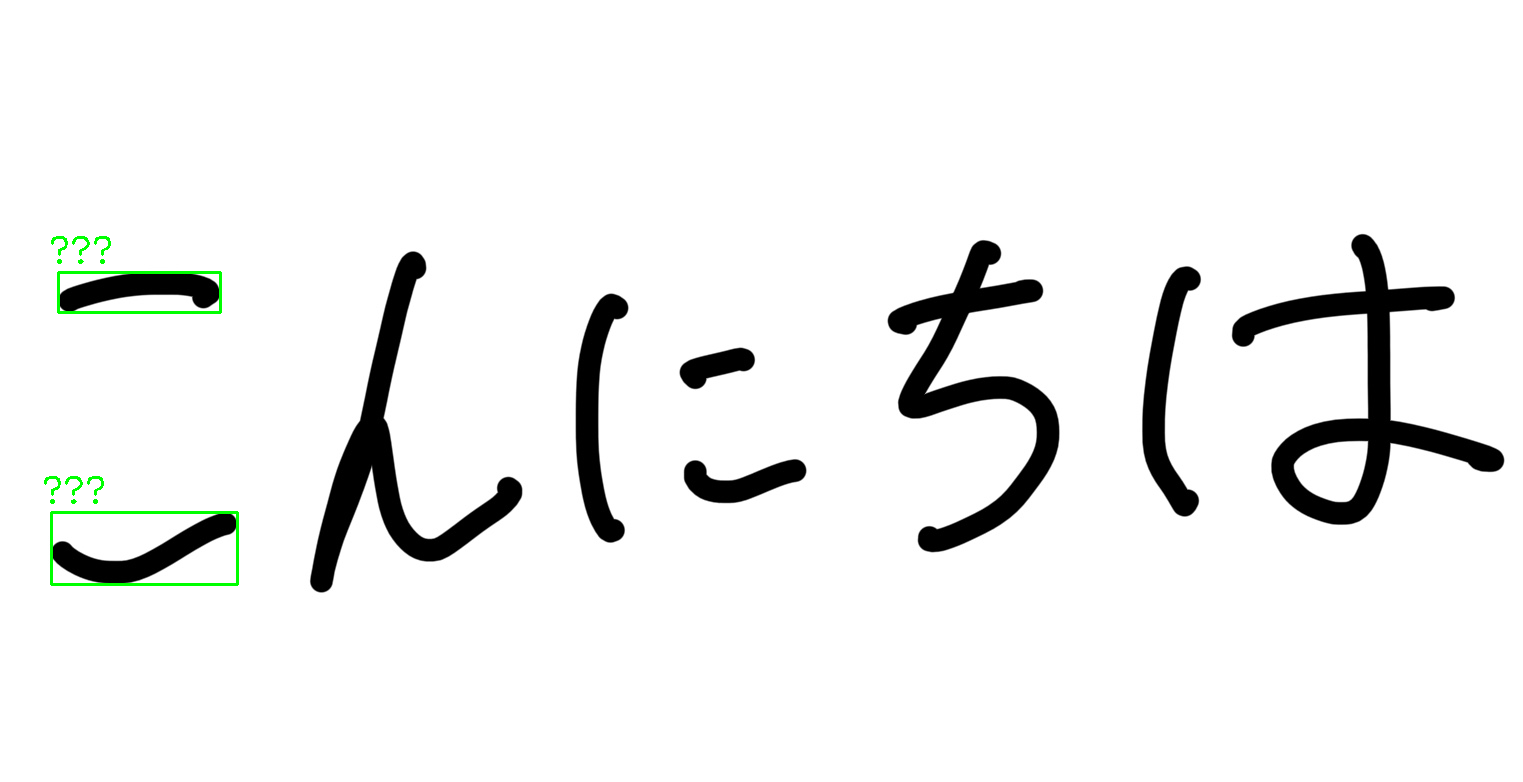

[INFO] を - 100.00%


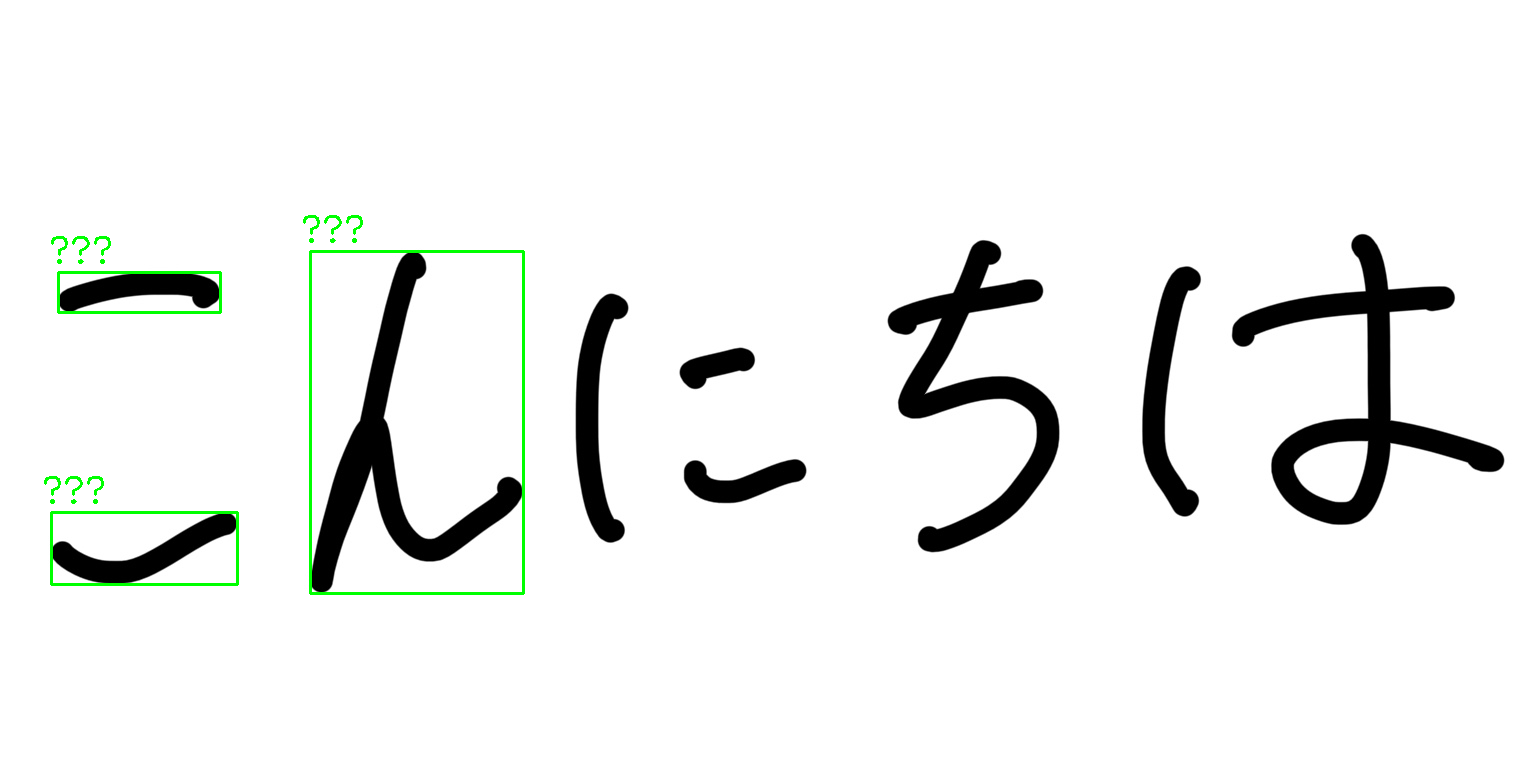

[INFO] し - 97.94%


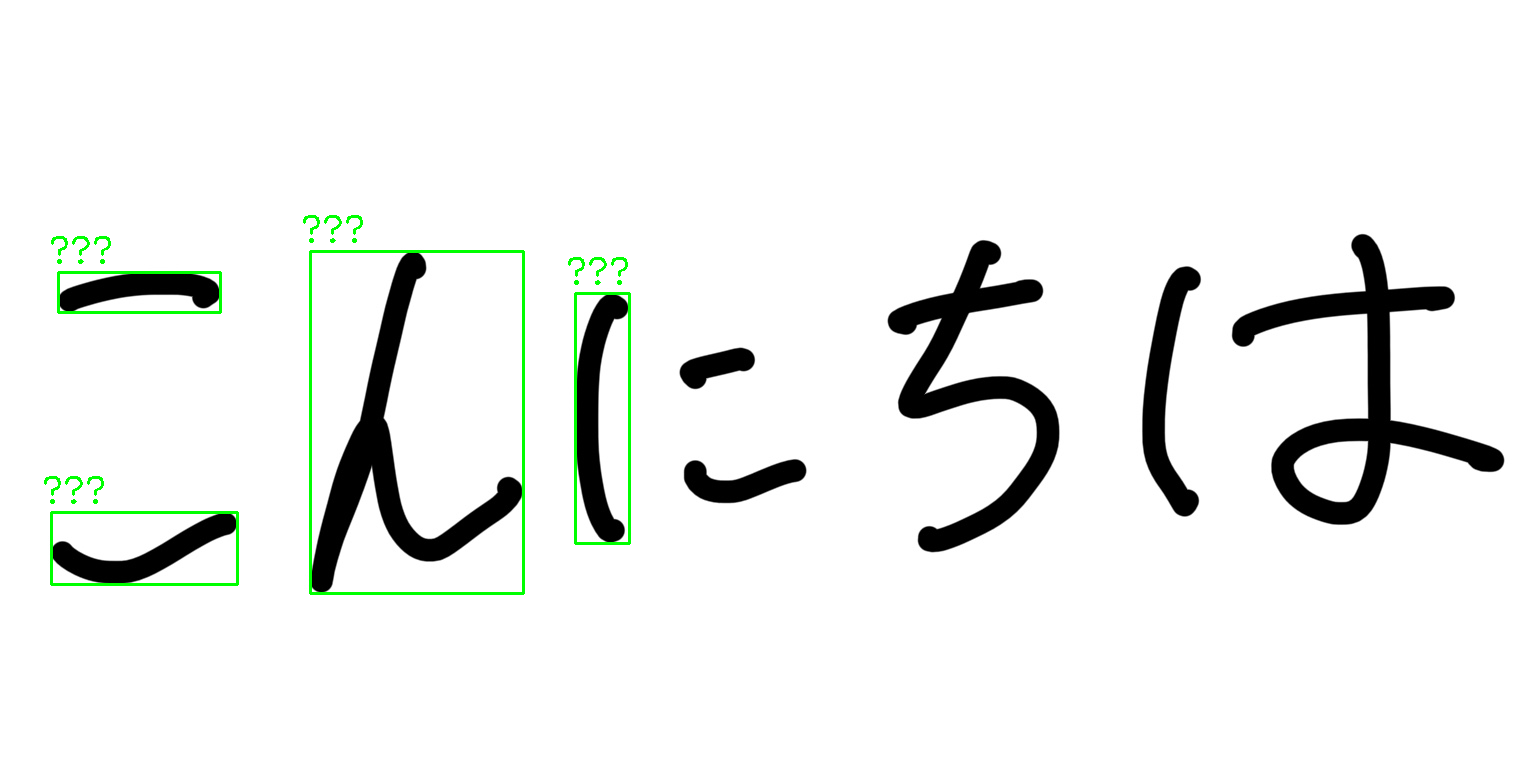

[INFO] せ - 77.06%


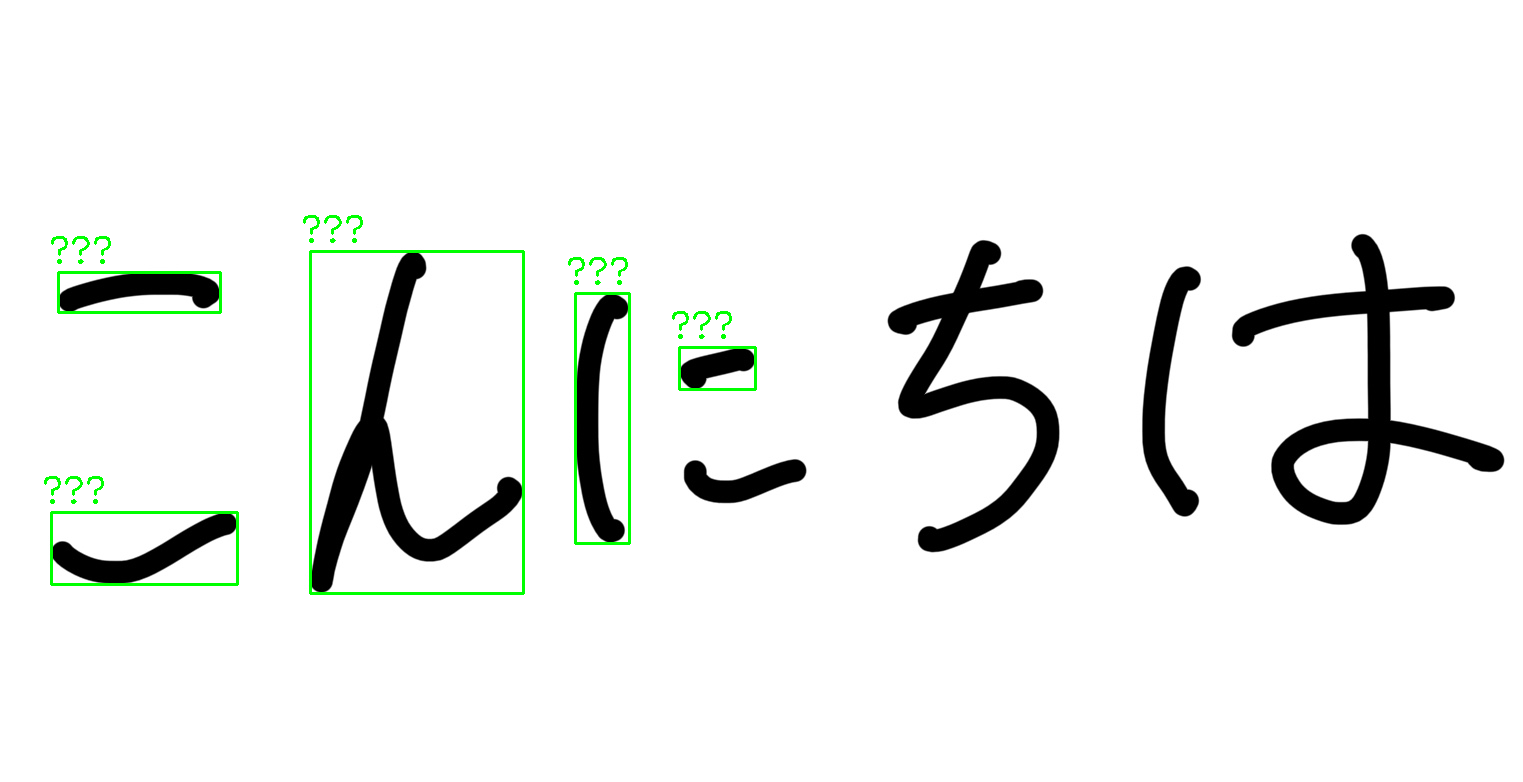

[INFO] せ - 96.96%


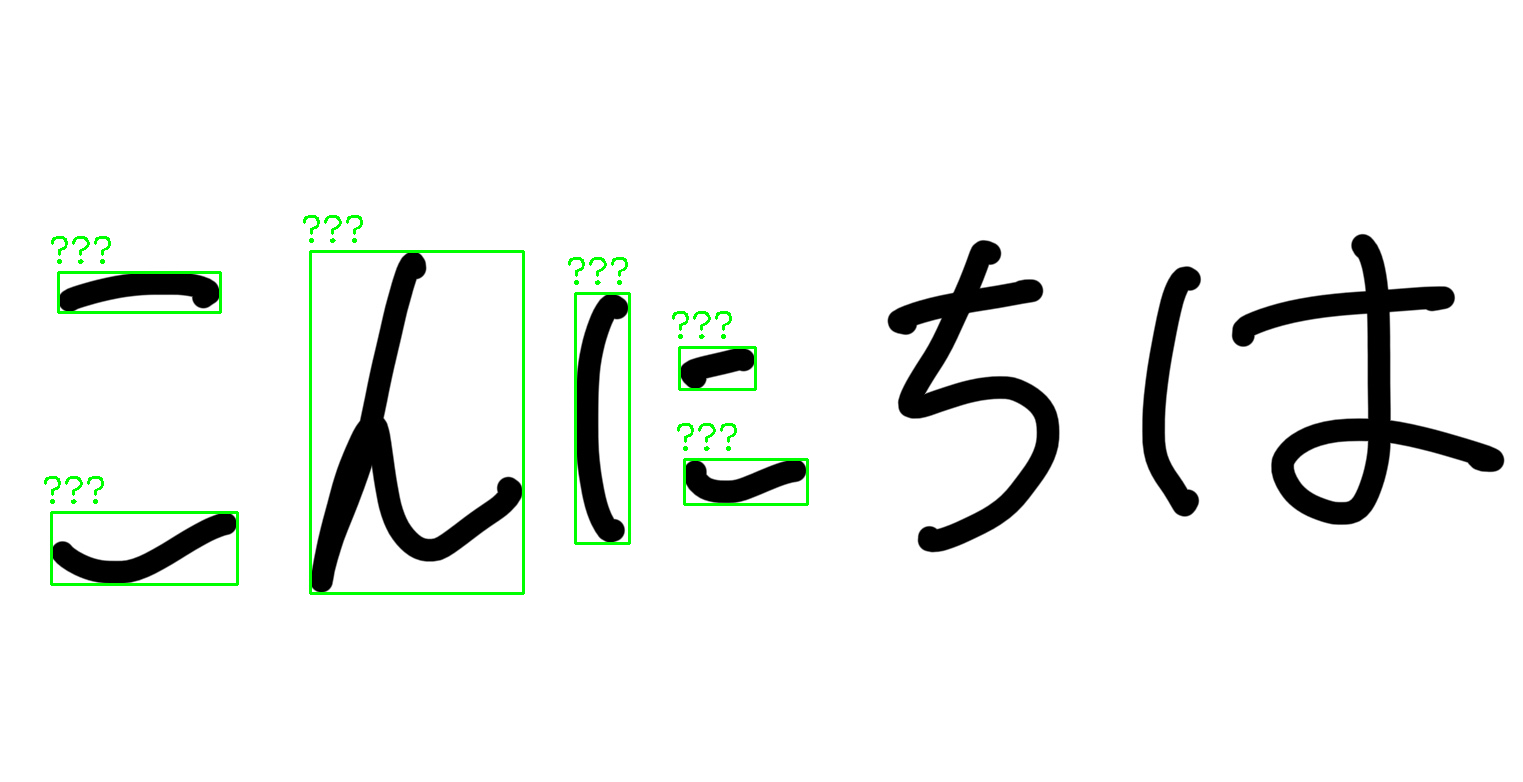

[INFO] ろ - 98.26%


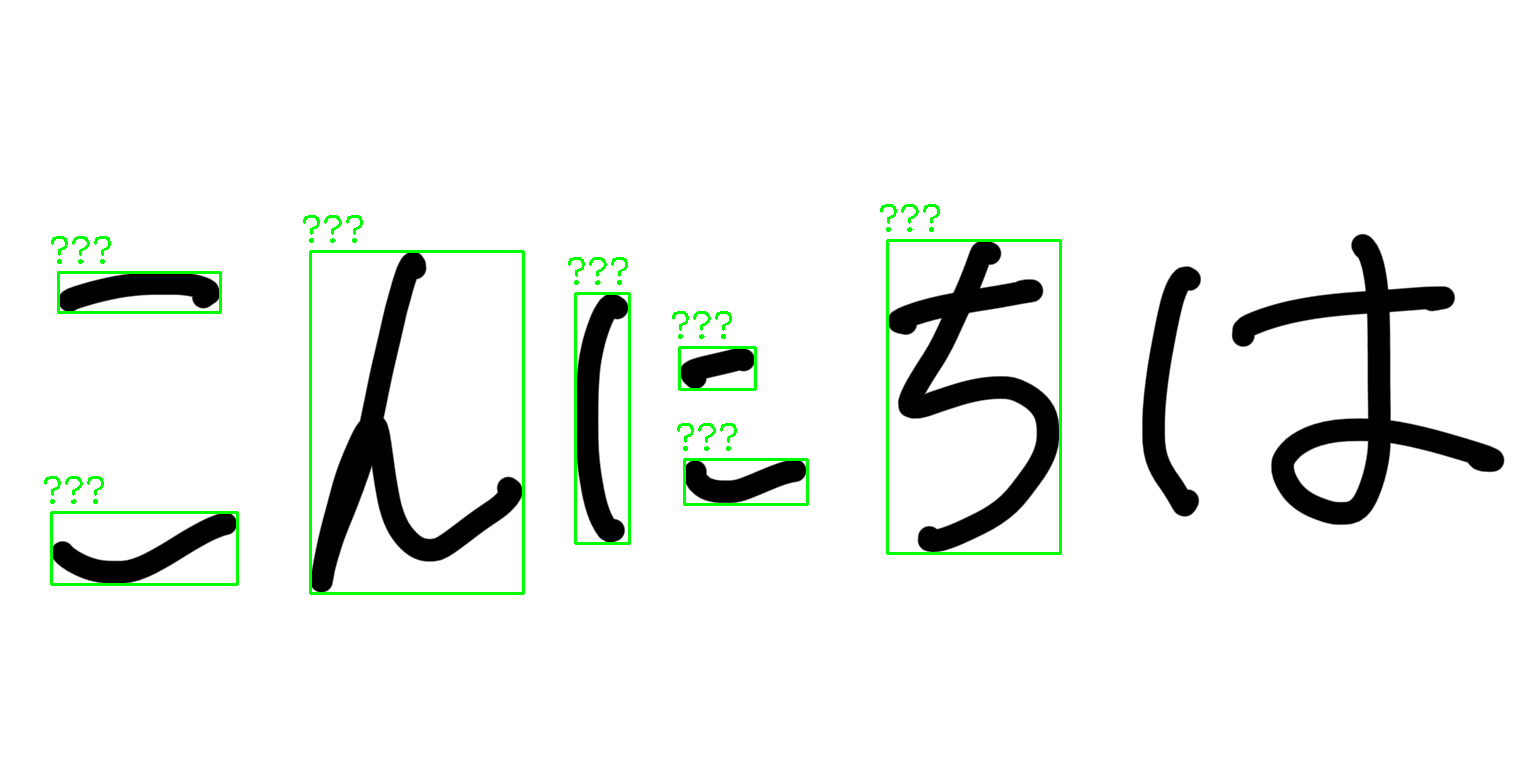

[INFO] も - 95.19%


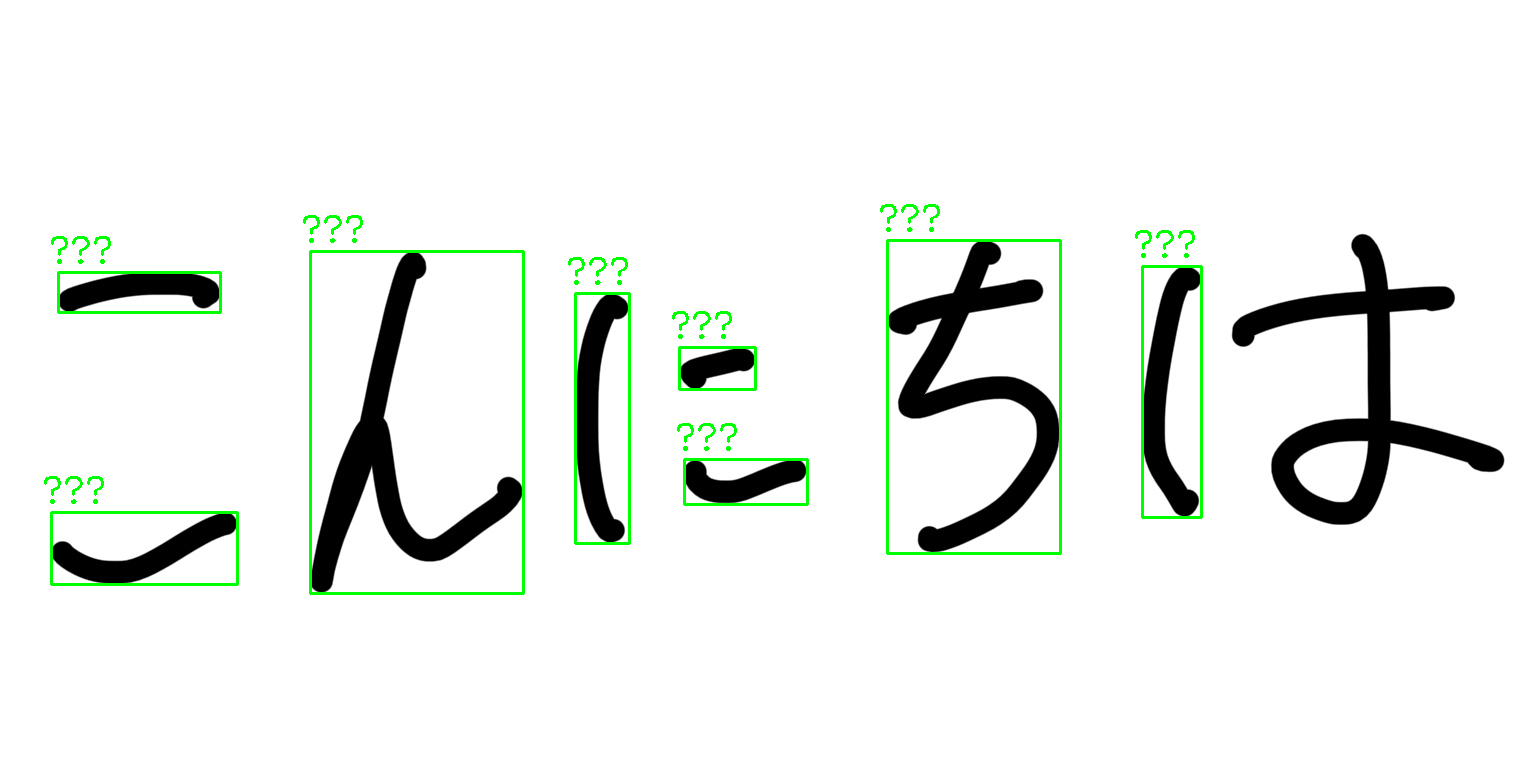

[INFO] よ - 39.08%


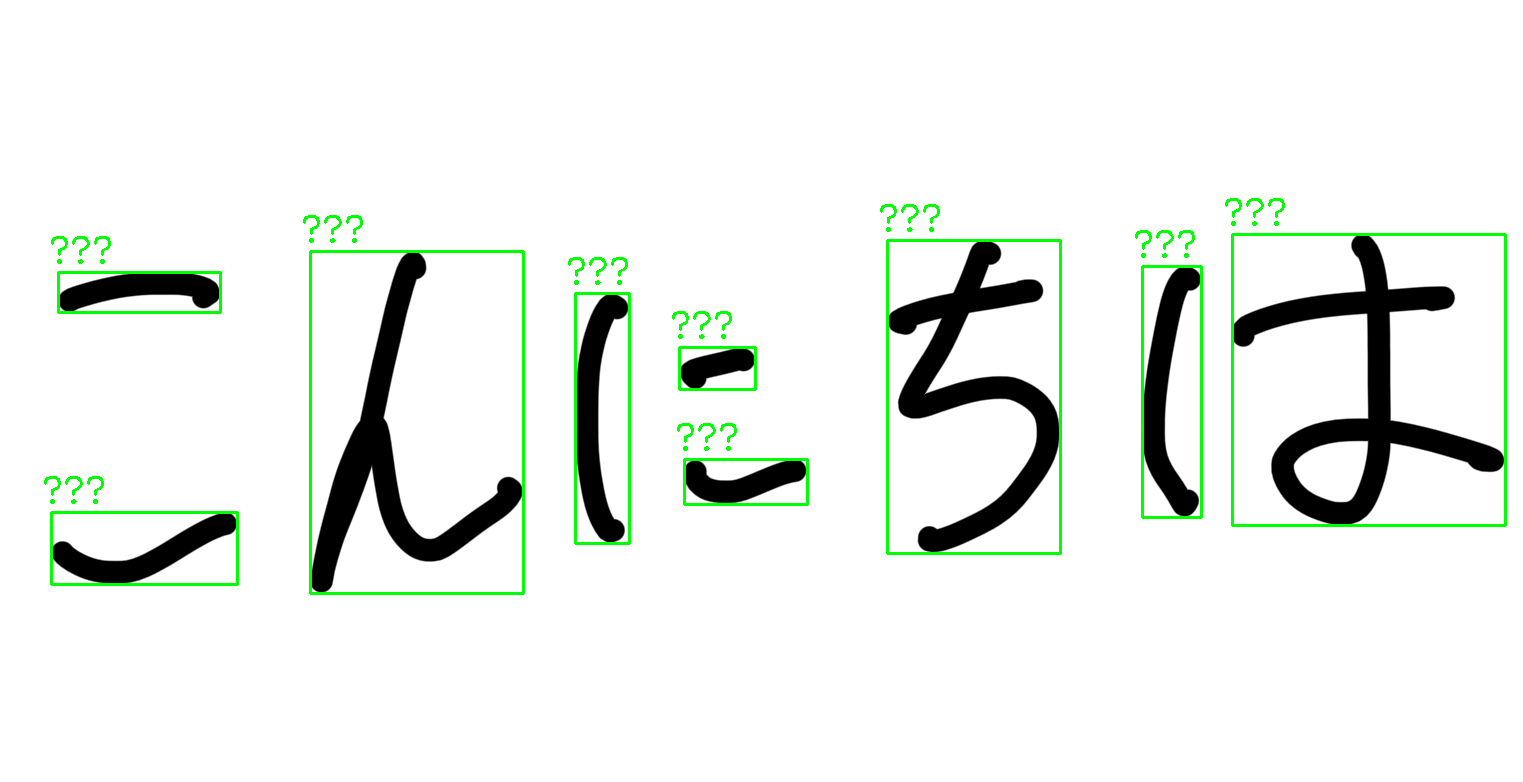

In [ ]:
# loop over the predictions and bounding box locations together
for (pred, (x, y, w, h)) in zip(preds, boxes):
	# find the index of the label with the largest corresponding
	# probability, then extract the probability and label
	i = np.argmax(pred)
	prob = pred[i]
	label = labelNames[i]
	# draw the prediction on the image
	print("[INFO] {} - {:.2f}%".format(label, prob * 100))
	cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
	cv2.putText(image, label, (x - 10, y - 10),
		cv2.FONT_HERSHEY_SIMPLEX, 1.2, (0, 255, 0), 2)
	# show the image
	cv2_imshow(image)
	cv2.waitKey(0)